In [2]:
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import imageio
from PIL import Image


from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [3]:
data = pd.read_excel("/content/FETAL_PLANES_DB_data.xlsx")
img = imageio.imread('/content/Patient00001_Plane1_11_of_15.png')
img.shape
type(img)

<ipython-input-3-e2a78ba7763c>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('/content/Patient00001_Plane1_11_of_15.png')


numpy.ndarray

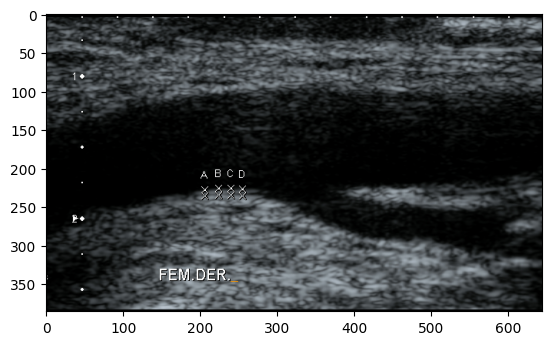

In [ ]:
data.head()
plt.imshow(img)

In [ ]:
img[50][100]

array([ 82,  87,  91, 255], dtype=uint8)

In [ ]:
#for i in range(386):
print(img[:, :, :])

[[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 ...

 [[  6   6   6 255]
  [  7   9   8 255]
  [ 11  13  12 255]
  ...
  [  5   7   6 255]
  [  7   9   8 255]
  [ 11  13  12 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]]


In [ ]:
data.head()

,Image_name,Patient_num,Plane,Brain_plane,Operator,US_Machine,Train
0,Patient00001_Plane1_1_of_15,1,Other,Not A Brain,Other,Aloka,1
1,Patient00001_Plane1_2_of_15,1,Other,Not A Brain,Other,Aloka,1
2,Patient00001_Plane1_3_of_15,1,Other,Not A Brain,Other,Aloka,1
3,Patient00001_Plane1_4_of_15,1,Other,Not A Brain,Other,Aloka,1
4,Patient00001_Plane1_5_of_15,1,Other,Not A Brain,Other,Aloka,1


In [ ]:


result = data['Patient_num'].value_counts()

print(result)


792    88
789    80
790    63
793    62
830    62
       ..
209     1
428     1
208     1
429     1
453     1
Name: Patient_num, Length: 1792, dtype: int64


In [ ]:


grouped = data.groupby('Patient_num')['Image_name'].apply(list)

print(grouped)

print(len(grouped))


Patient_num
1       [Patient00001_Plane1_1_of_15, Patient00001_Pla...
2       [Patient00002_Plane1_1_of_20, Patient00002_Pla...
3       [Patient00003_Plane1_1_of_21, Patient00003_Pla...
4       [Patient00004_Plane1_1_of_30, Patient00004_Pla...
5       [Patient00005_Plane1_1_of_25, Patient00005_Pla...
                              ...                        
1788    [Patient01788_Plane2_1_of_1, Patient01788_Plan...
1789    [Patient01789_Plane2_1_of_2, Patient01789_Plan...
1790    [Patient01790_Plane2_1_of_1, Patient01790_Plan...
1791    [Patient01791_Plane3_1_of_3, Patient01791_Plan...
1792    [Patient01792_Plane2_1_of_1, Patient01792_Plan...
Name: Image_name, Length: 1792, dtype: object
1792


In [ ]:
grouped2 = data.groupby('Plane')['Train '].apply(list)

print(grouped2)
print(grouped2[1][0])
print(len(grouped2))

Plane
Fetal abdomen      [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...
Fetal brain        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
Fetal femur        [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Fetal thorax       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...
Maternal cervix    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
Other              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
Name: Train , dtype: object
1
6


<Axes: ylabel='count'>

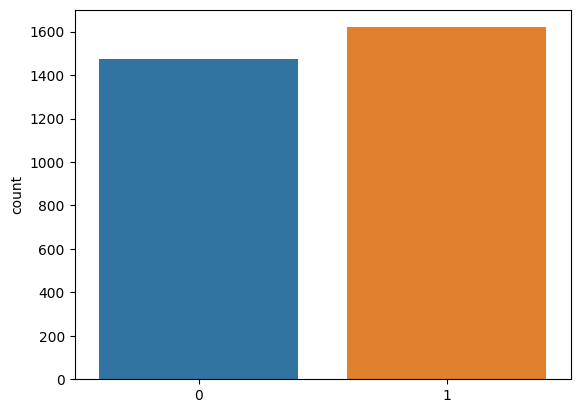

In [ ]:
sns.countplot(x = grouped2[1])

<Axes: ylabel='count'>

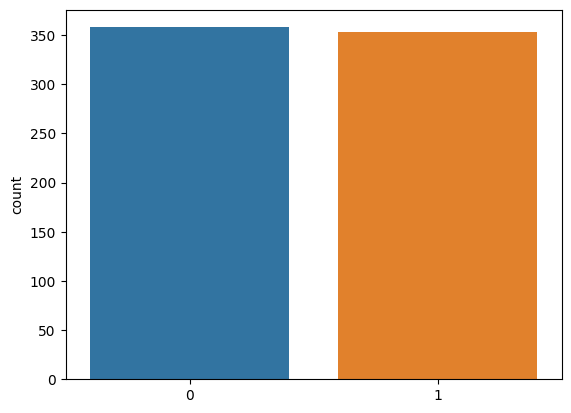

In [ ]:
sns.countplot(x = grouped2[0])

<Axes: ylabel='count'>

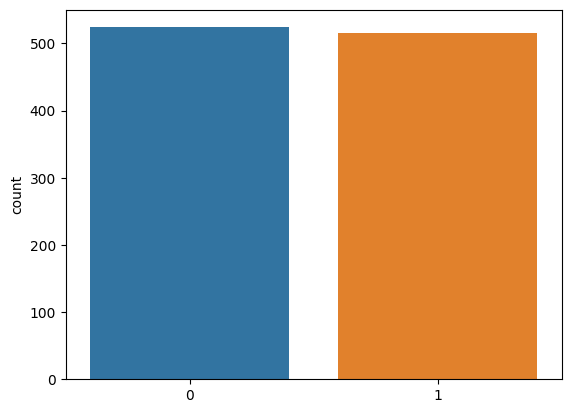

In [ ]:
sns.countplot(x = grouped2[2])

<Axes: ylabel='count'>

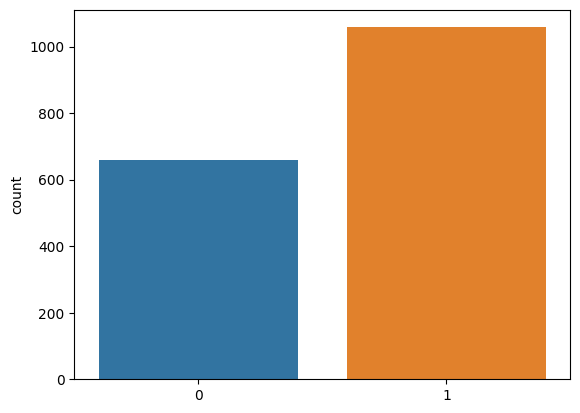

In [ ]:
sns.countplot(x = grouped2[3])

<Axes: ylabel='count'>

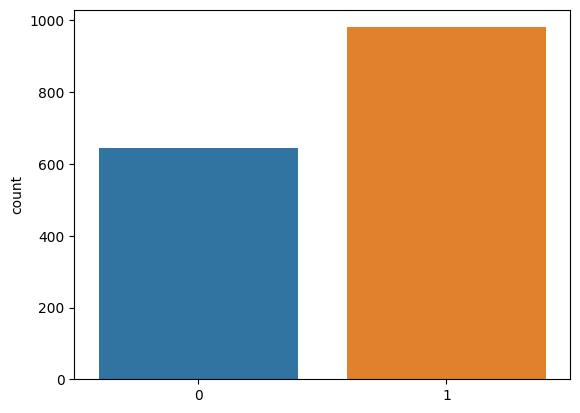

In [ ]:
sns.countplot(x = grouped2[4])

<Axes: ylabel='count'>

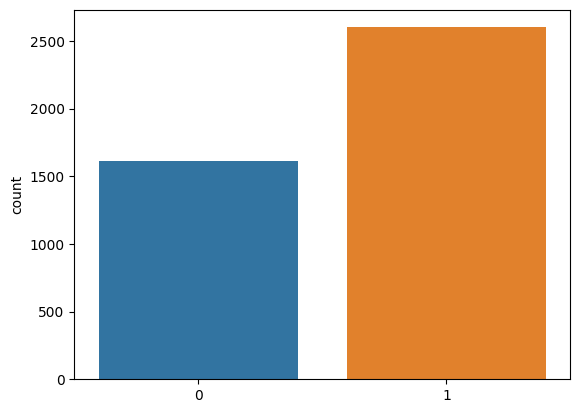

In [ ]:
sns.countplot(x = grouped2[5])

In [ ]:
grouped3 = data.groupby('Brain_plane')['Train '].apply(list)

print(grouped3)
print(grouped3[1][0])
print(len(grouped3))

Brain_plane
Not A Brain          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
Other                [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
Trans-cerebellum     [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...
Trans-thalamic       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...
Trans-ventricular    [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
Name: Train , dtype: object
0
5


<Axes: ylabel='count'>

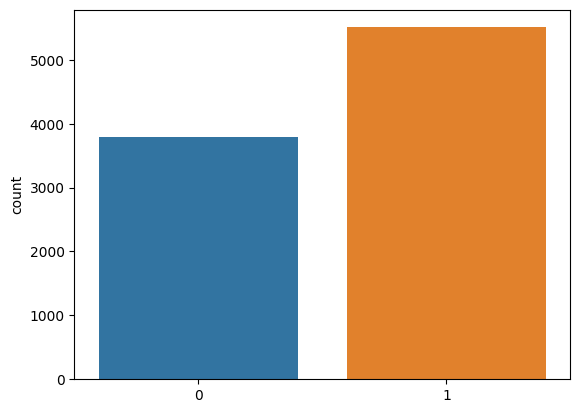

In [ ]:
sns.countplot(x = grouped3[0])

<Axes: ylabel='count'>

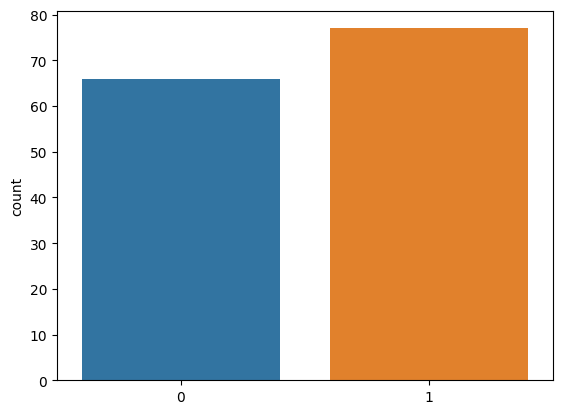

In [ ]:
sns.countplot(x = grouped3[1])

<Axes: ylabel='count'>

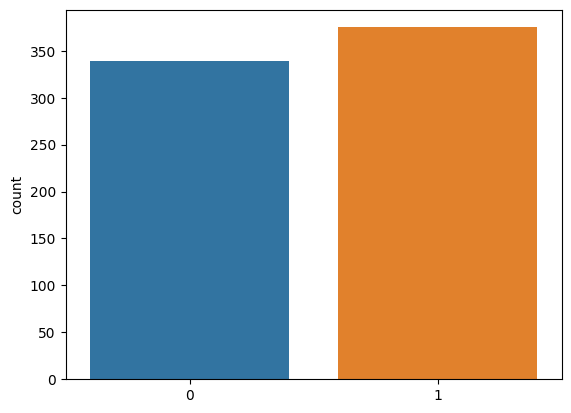

In [ ]:
sns.countplot(x = grouped3[2])

<Axes: ylabel='count'>

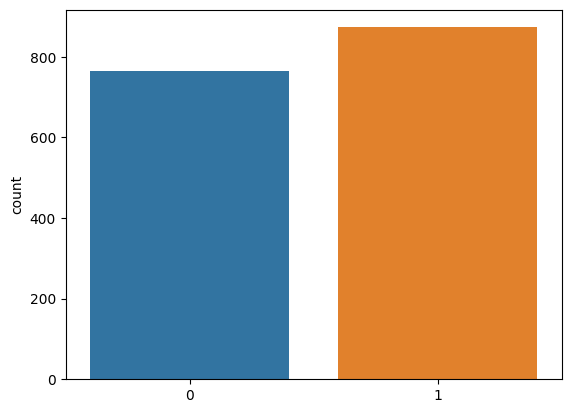

In [ ]:
sns.countplot(x = grouped3[3])

<Axes: ylabel='count'>

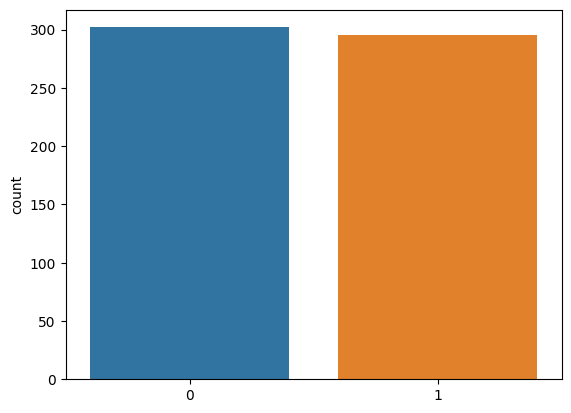

In [ ]:
sns.countplot(x = grouped3[4])

<ipython-input-34-0a91ddd34815>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  name_img = imageio.imread(name)


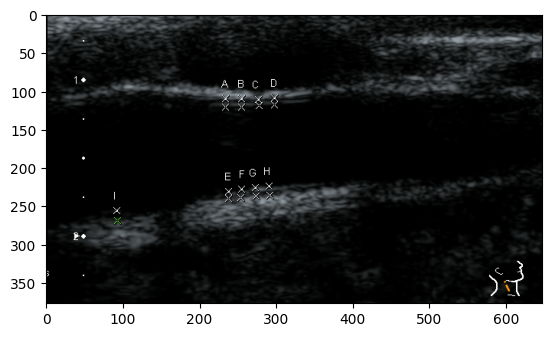

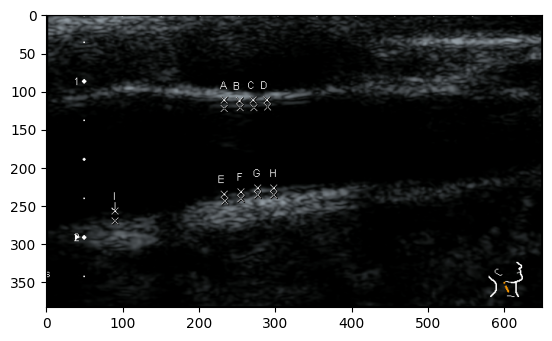

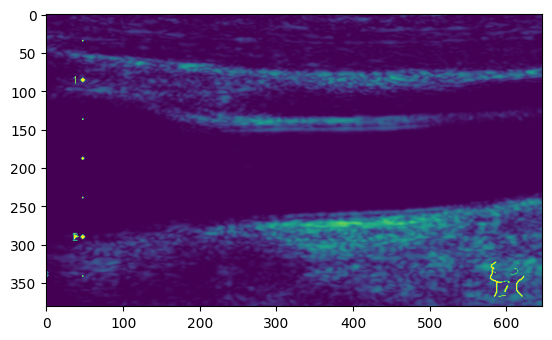

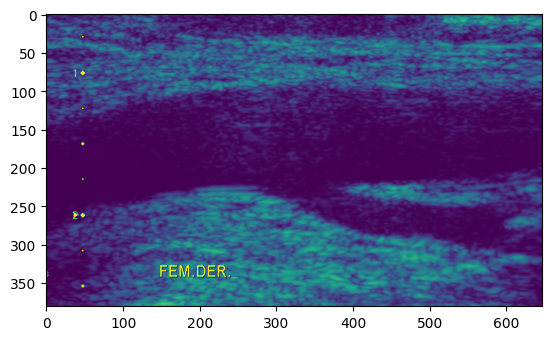

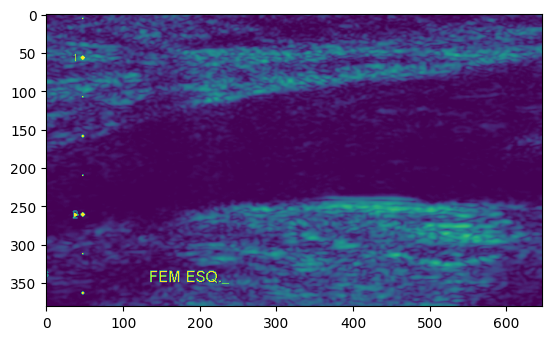

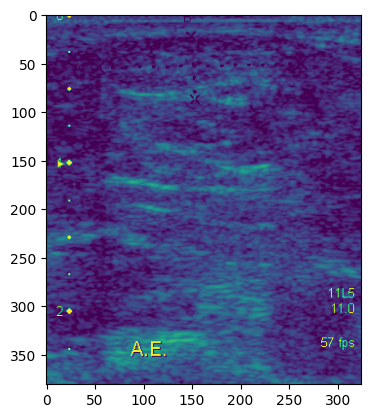

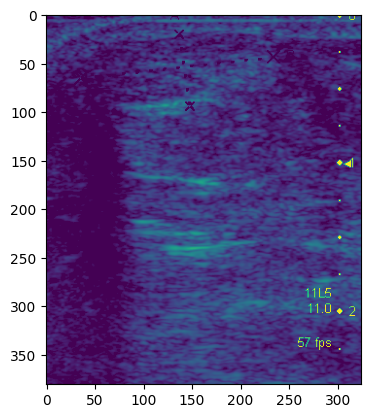

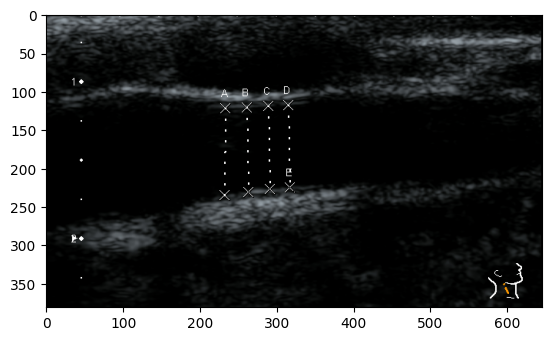

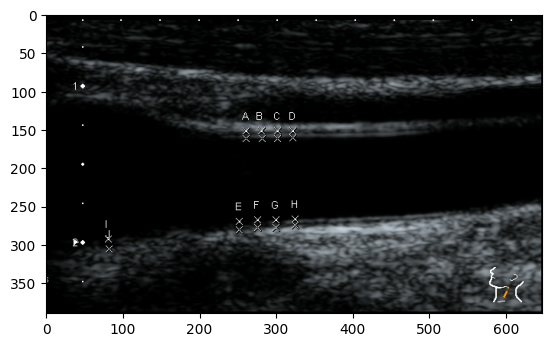

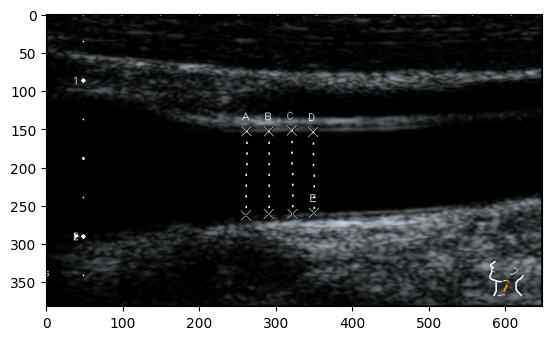

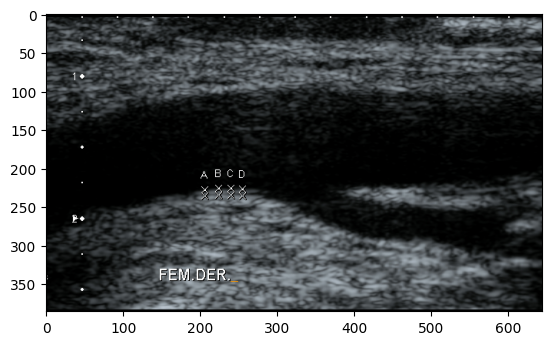

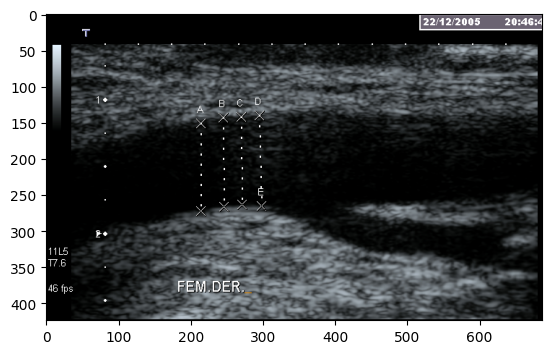

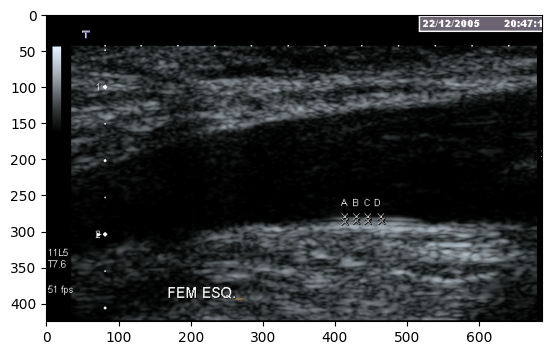

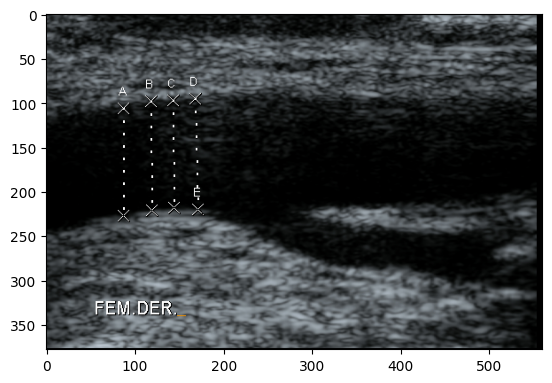

In [ ]:
from skimage import color


for i in range(14):
  name = '/content/'+grouped[1][i] + ".png"
  name_img = imageio.imread(name)
  plt.imshow(name_img)
  # to hide the axis
  plt.show()